In [24]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Ignore code above. It is just for formatting. Do not alter!
<hr>

# LAB 5 - Coupling SHELL-E to a NPZD2 plankton model

MARI4600/BIO5600: Ecosystem Modelling for Aquaculture (Dalhousie University)

----------------------------------------

**Rendered link:** http://nbviewer.jupyter.org/urls/github.com/Diego-Ibarra/aquaculture-modelling/blob/master/Week5/LAB%205%20Coupling%20SHELL-E%20to%20a%20NPZD2%20plankton%20model.ipynb

--------------------------------------



### Setup of workspace

<span class="important"></span> Make sure all required files are in the working directory:

* Create a **folder** on the "Desktop" and name it <span class='file'>Lab</span> (in this Lab, <span class='file'>Desktop\Lab</span> will be your working directory)
* From Brightspace, download the following files into your new folder <span class='file'>Desktop\Lab</span>:
   * <span class='file'>model_NPZD2.py</span>
   * <span class='file'>model_SHELLE.py</span> <span class="important"></span> Brightspace may had automatically renamed the file as <span class='file'>model_SHELLE1.py</span>. If so, after you downloaded the file, change the name back to <span class='file'>model_SHELLE.py</span>
* In Spyder, change the "working directory" to: <span class='file'>Desktop\Lab</span>. Note that to change the "working directory", click on "folder icon" on top-right corner.

----------------------------------


### Models BEFORE coupling

Lets play a bit with the SHELLE and NPZD2 models (before we couple them)....

Create a new file, name it <span class='file'>Lab5.py</span>, and save it in <span class='file'>Desktop\Lab</span>

First, lets play with SHELLE. Conceptually, this model can be though as growing ONE mussel inside a container with constant water characteristics (temp, Phy, Zoo, etc... are constant).

Then copy-paste the code below into <span class='file'>Lab5.py</span> and click <span class='runcell'></span>:



Model run: DONE!!!


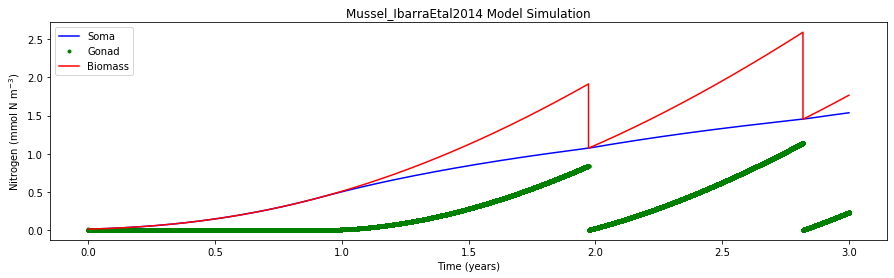

In [45]:
#%% Run standard SHELLE
import model_SHELLE as model

days, dt, par, InitCond = model.load_defaults()
output = model.run(days,dt,InitCond,par)
model.plot(output)

<div class="Q"><br>

Looking at the previous graph, how many times did our mussel spawned within the 3 year simulation?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Looking at the previous graph, did the mussel <b>Soma</b> ever decreased, or was it growing all the time?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Looking at the previous graph, what was the maximum <b>Soma</b> in the 3-year simulation?

<br><br><div class="qhelp"></div></div>

Now lets run the NPZD2 model...

Conceptually, this model can be though as growing Phytoplankton and Zooplankton in a 1 $m^3$ container.

Then copy-paste the code below into <span class='file'>Lab5.py</span> and click <span class='runcell'></span>:

Model run: DONE!!!


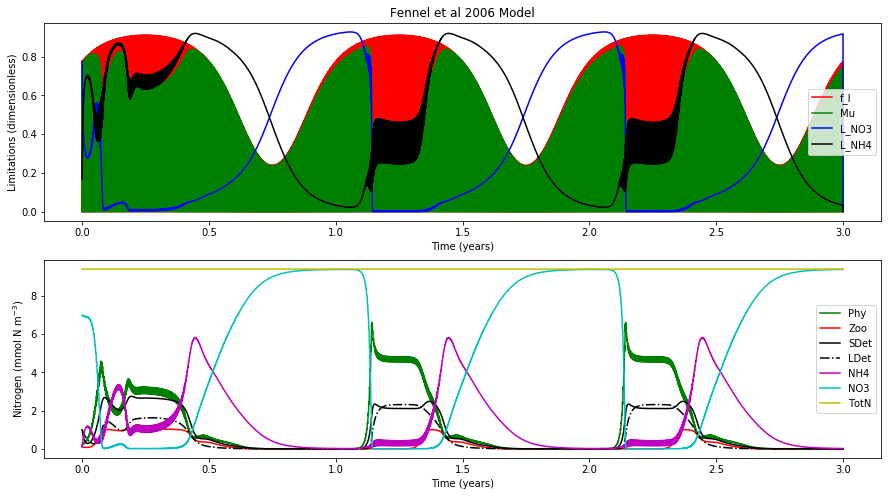

In [48]:
#%% Run standard NPZD2
import model_NPZD2 as model

days, dt, par, InitCond = model.load_defaults()
output = model.run(days,dt,InitCond,par)
model.plot(output)

<div class="Q"><br>

Take a look at the previous graph (upper panel), what was the <b>maximum</b> Phytoplankton Growth Rate (<b>Mu</b>)?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What was the Phytoplankton Growth Rate (<b>Mu</b>) around 0.75 years (i.e. middle of winter)?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What was limiting Phytoplankton Growth Rate (<b>Mu</b>) around 0.75 years (i.e. middle of winter)? ...or in other words, what caused the decrease in <b>Mu</b> around 0.75 years (i.e. middle of winter)?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

What was limiting Phytoplankton Growth Rate (<b>Mu</b>) around 1.25 years (i.e. middle of summer)? ...or in other words, what caused the decrease in <b>Mu</b> around 1.25 years (i.e. middle of summer)?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Take a look at the previous graph (lower panel), what was the <b>maximum</b> Phytoplankton biomass (<b>Phy</b>)?

<br><br><div class="qhelp"></div></div>

-------------------------

# Coupling

"Coupling" is where we join two (or more) models together. Here we will merge the NPZD2 model with the SHELLE model. The way we will do this is shown in the diagram below. Note that there are two steps. In the first step, we copy-paste the code from one model into the other model. Note that the copy-pasting results in a interspersed copy of the two codes. After we finished the copy-pasting, the two models are "one-way coupled", which means that the outputs of model 1 affect model 2, but the output of model 2 does not affect model 1. In the second step, we write new code to implement a feedback (i.e. model 2 affecting model 1), effectively achieving a "two-way coupling" of the 2 models.  

<img src="./diagram.png" width="500px">

--------------

Create a new file by "Saving-as" <span class='file'>model_NPZD2.py</span> with a new name... lets call the new file <span class='file'>model_NPZD2_SHELLE.py</span>. Make sure you saved it in your working directory <span class='file'>Desktop/Lab</span>

From now on, we are going to copy-paste code from <span class='file'>model_SHELLE.py</span> into the new <span class='file'>model_NPZD2_SHELLE.py</span>, which currently has a copy of the NPZD2 model. By the end, we will have the code of both model coupled into one file (<span class='file'>model_NPZD2_SHELLE.py</span>).

Conceptually, the <span class='file'>model_NPZD2_SHELLE.py</span> model can be though as growing ONE mussel inside a 1 $m^3$ container, where Phytoplankton, Zooplankton, Nutrients and Detritus interact with the ONE mussel (temp is constant).

------------------------------

### Parameters

Copy-paste `# Parameters` from <span class='file'>model_SHELLE.py</span> to <span class='file'>model_NPZD2_SHELLE.py</span> Copy-paste the "SHELLE" parameters just below the "NPZD2" parameters. <span class='important'></span> Copy only the parameters and **DO NOT COPY** `par = {}`, if you do you will recreate the dictionary `par` effectively deleting everything that was already inside it. There should be only **ONE** `par = {}` at the top of the section.

The new `# Parameters` code should look like this: 

In [27]:
    # Parameters
    par = {}
    # NPZD2
    par['mu0']   = 0.69  
    par['kNO3']  = 0.5    
    par['kNH4']  = 0.5  
    par['alpha'] = 0.125  
    par['gmax']  = 0.6
    par['kP']    = 0.44
    par['mP']    = 0.15    
    par['tau']   = 0.005 
    par['thetaMax'] = 0.053
    par['beta']  = 0.75 
    par['lBM']   = 0.1    
    par['lE']    = 0.1
    par['mZ']    = 0.25
    par['rSD']   = 0.3
    par['rLD']   = 0.1 
    par['nmax']  = 0.05
    par['kI']    = 0.1
    par['I0']    = 0.0095
    # SHELLE
    par['AE_P']    = 0.9  
    par['AE_D']    = 0.2    
    par['AE_Z']    = 0.3  
    par['Bpub']    = 0.43  
    par['Fmax_ref'] = 0.025
    par['GT']       = 0.44
    par['KTempH']   = 0.1    
    par['KTempL']   = 0.5 
    par['KSaltL']   = 0.25
    par['KOxyL']    = 0.02 
    par['KFood']    = 1.    
    par['KRE']   = 0.86
    par['OxyL']  = 17.5
    par['Rm']    = 0.002
    par['SaltL'] = 10.
    par['TempH'] = 25.
    par['TempL'] = -4.
    par['beta']  = 0.12
    par['epsilonP'] = 1.
    par['epsilonD'] = 0.5
    par['epsilonZ'] = 0.3

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 1</a></span>


--------------------

### Initial Conditions

Copy-paste `# Initial conditions` from <span class='file'>model_SHELLE.py</span> to <span class='file'>model_NPZD2_SHELLE.py</span>. Copy-paste the "SHELLE" InitCond just below the "NPZD2" InitCond.

Note that now there are duplicate InitCond... do not copy the SHELLE InitCond that are already in NPZD2 (i.e. Temp, Phy, Zoo, SDet)

<span class='important'></span> Copy only the InitCond and **DO NOT COPY** `InitCond = {}`, if you do, you will recreate the dictionary `InitCond` effectively deleting everything that was already inside it. There should be only **ONE** `InitCond = {}` at the top of the section.

The new `# Initial conditions` code should look like this:

In [28]:
    # Initial conditions
    #NDPZD2
    InitCond = {}
    InitCond['Phy']  = 0.2
    InitCond['Zoo']  = 0.1
    InitCond['SDet'] = 1. 
    InitCond['LDet'] = 1.
    InitCond['NH4']  = 0.1
    InitCond['NO3']  = 7.
    InitCond['Temp'] = 6.
    # SHELLE
    InitCond['Soma'] = 0.01
    InitCond['Gonad'] = 0.
    InitCond['Salt'] = 30. #Salinity
    InitCond['Oxy'] = 30. #Oxygen

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 2</a></span>

-----------------
### Creation of Zero vectors

Copy-paste `zero vectors` from <span class='file'>model_SHELLE.py</span> to <span class='file'>model_NPZD2_SHELLE.py</span>. Copy-paste the "SHELLE" zero-vectors just below the "NPZD2" zero-vectors.

Same as above, note that there may be duplicate zero-vectors... do not copy the SHELLE zero-vectors that are already in NPZD2 (i.e. Temp, Phy, Zoo, SDet)

The new code should look like this: 

In [ ]:
    # Create zero-vectors
    # NPZD2
    Phy = np.zeros((NoSTEPS,),float) # makes a vector array of zeros (size: NoSTEPS rows by ONE column)
    Zoo = np.zeros((NoSTEPS,),float) # same as above
    SDet = np.zeros((NoSTEPS,),float) # Biomass - same as above 
    LDet = np.zeros((NoSTEPS,),float) # same as above
    NH4 = np.zeros((NoSTEPS,),float) # same as above
    NO3 = np.zeros((NoSTEPS,),float) # same as above
    I  = np.zeros((NoSTEPS,),float) # same as above
    
    mu = np.zeros((NoSTEPS,),float) # same as above
    f_I = np.zeros((NoSTEPS,),float) # same as above
    L_NO3 = np.zeros((NoSTEPS,),float) # same as above
    L_NH4 = np.zeros((NoSTEPS,),float) # same as above
    TotN = np.zeros((NoSTEPS,),float) # same as above

    # SHELLE
    Soma = np.zeros((NoSTEPS,),float) # makes a vector array of zeros (size: NoSTEPS rows by ONE column)
    Gonad = np.zeros((NoSTEPS,),float) # same as above
    B = np.zeros((NoSTEPS,),float) # Biomass - same as above 
    L_Temp = np.zeros((NoSTEPS,),float) # same as above
    L_Salt = np.zeros((NoSTEPS,),float) # same as above
    L_Oxy = np.zeros((NoSTEPS,),float) # same as above
    L_Food = np.zeros((NoSTEPS,),float) # same as above
    F = np.zeros((NoSTEPS,),float) # same as above
    A = np.zeros((NoSTEPS,),float) # same as above
    R = np.zeros((NoSTEPS,),float) # same as above
    RE = np.zeros((NoSTEPS,),float) # same as above
    Spawning = np.zeros((NoSTEPS,),float) # same as above  

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 3</a></span>

--------------------

### Initializing with initial conditions

Copy-paste the section `# Initializing with initial conditions` from <span class='file'>model_SHELLE.py</span> to <span class='file'>model_NPZD2_SHELLE.py</span>.

Copy-paste the "SHELLE" section just below the one for "NPZD2".

Same as above, note that there may be duplicate initialization... do not copy the SHELLE zero-vectors that are already in NPZD2 (i.e. Temp)

Additionally, in SHELLE we used to create time-series of variables that now will be calculated by the NPZD2 model. Thus, lines like `Phy = np.ones((NoSTEPS,),float) * InitCond['Phy']` are redundant and should not be copied.

The new `# Initializing with initial conditions` code should look like this:

In [ ]:
    # Initializing with initial conditions
    # NPZD2
    Phy[0] = InitCond['Phy']
    Zoo[0] = InitCond['Zoo']
    SDet[0] = InitCond['SDet']
    LDet[0] = InitCond['LDet']
    NH4[0] = InitCond['NH4']
    NO3[0] = InitCond['NO3']
    
    # Initializing TotN
    TotN[0] = Phy[0] + Zoo[0] + SDet[0] + LDet[0] + NH4[0] + NO3[0]
    
    Temp = np.ones((NoSTEPS,),float) * InitCond['Temp'] #Temperature
    
    # SHELLE
    Soma[0] = InitCond['Soma']
    Gonad[0] = InitCond['Soma']
    B[0] = InitCond['Soma'] + InitCond['Gonad']
    Spawning[0] = 0.
    Salt = np.ones((NoSTEPS,),float) * InitCond['Salt']#Salinity
    Oxy = np.ones((NoSTEPS,),float) * InitCond['Oxy'] #Oxygen

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 4</a></span>

-------------------------------
### Update and step

Copy-paste `# Update and step` from <span class='file'>model_SHELLE.py</span> to <span class='file'>model_NPZD2_SHELLE.py</span>.

Copy-paste the "SHELLE" "Update and step" just below the one for "NPZD2".

The new `# Update and step` code should look like this:

In [ ]:
        # Update and step ----------------------------------------------------
        # NPZD2
        Phy[t+1]  = Phy[t]  + (dPhydt * dt)
        Zoo[t+1]  = Zoo[t]  + (dZoodt * dt)
        SDet[t+1] = SDet[t] + (dSDetdt * dt)
        LDet[t+1] = LDet[t] + (dLDetdt * dt)
        NH4[t+1]  = NH4[t]  + (dNH4dt * dt)
        NO3[t+1]  = NO3[t]  + (dNO3dt * dt)
        if NO3[t+1] <= 0.0001:
            offset = NO3[t+1]
            NH4[t+1] = NH4[t+1] + offset
            NO3[t+1] = NO3[t+1] - offset
        
        # SHELLE
        Soma[t+1] = Soma[t] + (dSomadt * dt)
        Gonad[t+1] = Gonad[t] + (dGonaddt * dt)  - Spawning[t]
        B[t+1] = Soma[t+1] + Gonad[t+1]

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 5</a></span>

---------------------------

### MAIN MODEL LOOP


Copy-paste `# MAIN MODEL LOOP` from <span class='file'>model_SHELLE.py</span> to <span class='file'>model_NPZD2_SHELLE.py</span>.

Copy-paste the "SHELLE" MAIN MODEL LOOP just below the one for "NPZD2"

The new `# MAIN MODEL LOOP` code should look like this:

In [ ]:
    # *****************************************************************************
    # MAIN MODEL LOOP *************************************************************
    for t in range(0,NoSTEPS-1):
        # NPZD2
        muMax = par['mu0'] * (1.066 ** Temp[t]) # text
        
        f_I[t] = (par['alpha']*I[t])/(np.sqrt(muMax**2+((par['alpha']**2)*(I[t]**2)))) #Eq5
        
        L_NO3[t] = (NO3[t]/(par['kNO3']+NO3[t])) * (1/(1+(NH4[t]/par['kNH4']))) #Eq3
        
        L_NH4[t] = NH4[t]/(par['kNH4']+NH4[t]) # Eq 4
    
        mu[t] =muMax * f_I[t] * (L_NO3[t] + L_NH4[t]) # Eq2
    
        g = par['gmax'] * (Phy[t]**2/(par['kP']+(Phy[t]**2)))
        
        n = par['nmax'] * (1 - max(0,(I[t]-par['I0'])/(par['kI']+I[t]-par['I0'])))
    
        dPhydt = (mu[t] * Phy[t]) - \
                 (g  * Zoo[t]) - \
                 (par['mP'] * Phy[t]) - \
                 (par['tau']*(SDet[t]+Phy[t])*Phy[t]) # Eq1
                 
        dZoodt = (g * par['beta'] * Zoo[t]) - \
                 (par['lBM']*Zoo[t]) - \
                 (par['lE']*((Phy[t]**2)/(par['kP']+(Phy[t]**2)))*par['beta']*Zoo[t]) - \
                 (par['mZ']*(Zoo[t]**2))#Eq10
                 
        dSDetdt = (g * (1-par['beta']) * Zoo[t]) + \
                  (par['mZ']*(Zoo[t]**2)) + \
                  (par['mP'] * Phy[t]) - \
                  (par['tau']*(SDet[t]+Phy[t])*SDet[t]) - \
                  (par['rSD']*SDet[t])
                  
        dLDetdt = (par['tau']*((SDet[t]+Phy[t])**2)) - \
                  (par['rLD']*LDet[t])
                  
        dNO3dt = -(muMax * f_I[t] * L_NO3[t] * Phy[t]) + \
                  (n * NH4[t])
                 
        dNH4dt = -(muMax * f_I[t] * L_NH4[t] * Phy[t]) - \
                  (n * NH4[t]) + \
                  (par['lBM'] * Zoo[t]) + \
                  (par['lE']*((Phy[t]**2)/(par['kP']+(Phy[t]**2)))*par['beta']*Zoo[t]) + \
                  (par['rSD']*SDet[t]) + \
                  (par['rLD']*LDet[t])
                  
        # SHELLE
        # Calculate Temperature Limitation
        L_Temp[t] = min(max(0.,1.-np.exp(-par['KTempL']*(Temp[t]-par['TempL']))), \
                     max(0.,1.+((1.-np.exp(par['KTempH']*Temp[t]))/(np.exp(par['KTempH']*par['TempH'])-1.))))
        
        # Calculate Salinity Limitation
        L_Salt[t] = max(0.,1.-np.exp(-par['KSaltL']*(Salt[t]-par['SaltL'])))
        
        # Calculate Oxygen Limitation
        L_Oxy[t] = max(0.,1.-np.exp(-par['KOxyL']*(Oxy[t]-par['OxyL'])))
        
        # Calculate Oxygen Limitation
        L_Food[t] = (Phy[t]+Zoo[t]+SDet[t])/(par['KFood']+Phy[t]+Zoo[t]+SDet[t])
        
        # Calculate Filtration rate
        Fmax  = par['Fmax_ref']*(B[t]**(2./3.))
        
        F[t] = Fmax * L_Temp[t] * L_Salt[t] * L_Oxy[t] * L_Food[t]
        
        A[t] = F[t] * ((par['epsilonP']*par['AE_P']*Phy[t])+ \
                       (par['epsilonZ']*par['AE_Z']*Zoo[t])+ \
                       (par['epsilonD']*par['AE_D']*SDet[t]))
        
        R[t] = (par['Rm']*B[t]) + (par['beta']*A[t])
        
        RE[t] = max(0., (B[t]-par['Bpub'])/(par['KRE'] + B[t] - (2.*par['Bpub'])))
        
        # Spawning
        if Gonad[t]/B[t] < par['GT']:
            Spawning[t] = 0.
            dGonaddt = (A[t]-R[t]) * RE[t]
            dSomadt =  (A[t]-R[t]) * (1.-RE[t])
        elif Gonad[t]/B[t] >= par['GT']:         
            Spawning[t] = Gonad[t]
            dGonaddt = 0.
            dSomadt = A[t]-R[t]
        else:
            dGonaddt = 0.
            dSomadt = 0.   

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 6</a></span>

------------------

### Pack output into dictionary

Copy-paste section `#Pack output into dictionary` from <span class='file'>model_SHELLE.py</span> to <span class='file'>model_NPZD2_SHELLE.py</span>.

Copy-paste the "SHELLE" section just below the one for "NPZD2". Note that they are duplicates, so don't copy the duplicates (i.e. time, Phy, SDet, etc.).

<span class='important'></span> **DO NOT COPY** `output = {}`, if you do, you will recreate the dictionary `output` effectively deleting everything that was already inside it. There should be only **ONE** `output = {}` at the top of the section.

The new `#Pack output into dictionary` code should look like this:

In [ ]:
    # Pack output into dictionary
    output = {}
    output['time'] = time
    # NPZD2
    output['Phy'] = Phy
    output['Zoo'] = Zoo
    output['SDet'] = SDet
    output['LDet'] = LDet
    output['NH4'] = NH4
    output['NO3'] = NO3
    output['mu'] = mu
    output['f_I'] = f_I
    output['L_NO3'] = L_NO3
    output['L_NH4'] = L_NH4
    output['TotN'] = TotN
    #SHELLE
    output['Soma'] = Soma
    output['Gonad'] = Gonad
    output['B'] = B
    output['Spawning'] = Spawning
    output['Temp'] = Temp
    output['Salt'] = Salt

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 7</a></span>

Update plot by adding to the plotting code for `ax2`:

```
ax2.plot(output['time']/365,output['B'],'r.')

```

Also, add `B` to the list labels in `plt.legend(['Phy','Zoo','SDet','LDet','NH4','NO3','TotN'])`

The new code should look like this:

In [ ]:
    # Plotting
    fig, (ax, ax2) = plt.subplots(2,1,figsize=(15, 8))

    ax.plot(output['time']/365,output['f_I'],'r-')
    ax.plot(output['time']/365,output['mu'],'g-')
    ax.plot(output['time']/365,output['L_NO3'],'b-')
    ax.plot(output['time']/365,output['L_NH4'],'k-')
    ax.set_xlabel('Time (years)')
    ax.set_ylabel('Limitations (dimensionless)')
    ax.set_title('Fennel et al 2006 Model')
    ax.legend(['f_I','Mu','L_NO3','L_NH4'])
    
    ax2.plot(output['time']/365,output['Phy'],'g-')
    ax2.plot(output['time']/365,output['Zoo'],'r-')
    ax2.plot(output['time']/365,output['SDet'],'k-')
    ax2.plot(output['time']/365,output['LDet'],'k-.')
    ax2.plot(output['time']/365,output['NH4'],'m-')
    ax2.plot(output['time']/365,output['NO3'],'c-')
    ax2.plot(output['time']/365,output['TotN'],'y-')
    ax2.plot(output['time']/365,output['B'],'r.')  # <<<<<<<<<<<<<<<<<<<<<<<<< THIS IS NEW <<<<<<<<<<<<<<<<<
    ax2.set_xlabel('Time (years)')
    ax2.set_ylabel('Nitrogen (mmol N m$^{-3}$)')
    plt.legend(['Phy','Zoo','SDet','LDet','NH4','NO3','TotN','B']) # <<<<<<<<< THIS CHANGED <<<<<<<<<<<<<<<<
    plt.show()

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 8</a></span>

<span class="run"></span> the model <span class='file'>model_NPZD2_SHELLE.py</span> so that you can see a plot.

<img src="./1.png">


<div class="Q"><br>

Do you think <b>Total Nitrogen</b> is conserved throughout the simulation?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

<b>...are you sure?</b>
<br><br>
Hint: This question refers to your answer in the previous question

<br><br><div class="qhelp"></div></div>

As a rule of thumb, if your model seems to works "just fine" on the **1st try**, there is probably something wrong. Take a few minutes and see if you can find what is wrong with `TotNit`.

<br>
<br>
<br>
...
<br>
<br>
<br>
<br>
<br>

The code that calculates `TotNit` is no longer correct, because `B` is not accounted for in the Total Nitrogen calculation. Even though the graph shows `TotNit` constant over the simulation, we can't really assess mass balance until we include ALL the nitrogen sources in our calculation. 

------------------

### Total nitrogen

Add `+ B[t+1]` to the section `TotN[t+1] = Phy[t+1] + Zoo[t+1] + SDet[t+1] + LDet[t+1] + NH4[t+1] + NO3[t+1]` in <span class='file'>model_NPZD2_SHELLE.py</span>.

The new `# Estimate Total Nitrogen` code should look like this:

In [ ]:
        # Estimate Total Nitrogen
        TotN[t+1] = Phy[t+1] + Zoo[t+1] + SDet[t+1] + LDet[t+1] + NH4[t+1] + NO3[t+1] + B[t+1]

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 9</a></span>

<span class="run"></span> the model <span class='file'>model_NPZD2_SHELLE.py</span> to do the plot again.

<img src="./2.png">

<span class="important"></span> If you got the previous 2 questions wrong, make sure you go back and change your answer.  

<div class="Q"><br>

Lets try it again (bonus question), do you think <b>Total Nitrogen</b> is conserved throughout the simulation?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Why do you think <b>TotNit</b> increases during the simulation?

<br><br><div class="qhelp"></div></div>

### Adding a "feedback" (i.e. two-way coupling)

We added Mussels to NPZD2, but they are not fully connected yet. "Food" is eaten by the mussels but nothing is taken out of the NPZD2 pool.

To fully connect the 2 models, we have to add extra terms to our original equations. Below, as an example, is the original Phytoplankton equation and then the new equation with an added term to account for mussel filtration. 

(original from Fennel et al. 2006)

$$ \frac{\partial Phy}{\partial t} = \mu Phy - gZoo - m_P Phy - \tau (SDet -Phy)Phy$$

(new) $$ \frac{\partial Phy}{\partial t} = \mu Phy - gZoo - m_P Phy - \tau (SDet -Phy)Phy - F \epsilon_P Phy$$

<span class="note"></span> I am not showing the new equations for `Zoo`, `LDet`, `SDet`, `NO3`, `NH4`. However you can see them in _Ibarra et al 2014_.

To actually code the "feedback", we need to add code to:

* Ad feaces and Pseudo-faeces to `LDet`
* filter `Phy`, `Zoo` and `SDet` out of the water-column
* excrete into `NH4`
* ...and convert spawning biomass into `Zoo`

The new code goes after "Spawning" but before "Update and step".

The new code should look like this:

In [ ]:
        # Spawning
        if Gonad[t]/B[t] < par['GT']:
            Spawning[t] = 0.
            dGonaddt = (A[t]-R[t]) * RE[t]
            dSomadt =  (A[t]-R[t]) * (1.-RE[t])
        elif Gonad[t]/B[t] >= par['GT']:         
            Spawning[t] = Gonad[t]
            dGonaddt = 0.
            dSomadt = A[t]-R[t]
            Zoo[t] =  Zoo[t] + Spawning[t] # <<<<<<<<<<<<<<<<<<<<<<<<<<< NEW LINE !!! <<<<<<<<<<<<<<<
        else:
            dGonaddt = 0.
            dSomadt = 0.   
                  
    
        # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW SECTION STARTS HERE !!! <<<<<<<<<<<<<<
        #Feedback to NPZD2 model
        # Faeces and Pseudofaeces
        Fae = F[t] * ((par['epsilonP']*(1-par['AE_P'])*Phy[t])+ \
                     (par['epsilonZ']*(1-par['AE_Z'])*Zoo[t])+ \
                     (par['epsilonD']*(1-par['AE_D'])*SDet[t]))
        
        dLDetdt = dLDetdt + Fae      
                  
        # Remove eaten Phy, Zoo and SDet from water-column
        dPhydt =  dPhydt-(F[t] *par['epsilonP']*Phy[t])
        dZoodt =  dZoodt-(F[t] *par['epsilonZ']*Zoo[t])
        dSDetdt = dSDetdt -(F[t] *par['epsilonD']*SDet[t])
        
        # Excretion into Ammonia
        dNH4dt = dNH4dt + R[t]    
        # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< NEW SECTION END HERE !!! <<<<<<<<<<<<<<<<<
    
        # Update and step ----------------------------------------------------
        # NPZD2
        Phy[t+1]  = Phy[t]  + (dPhydt * dt)
        Zoo[t+1]  = Zoo[t]  + (dZoodt * dt)
        SDet[t+1] = SDet[t] + (dSDetdt * dt)
        LDet[t+1] = LDet[t] + (dLDetdt * dt)
        NH4[t+1]  = NH4[t]  + (dNH4dt * dt)
        NO3[t+1]  = NO3[t]  + (dNO3dt * dt)

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 10</a></span>

<br>
<br>

**That is it! Congratulations!** You have successfully coupled SHELLE and NPZD2!

<span class="run"></span> the model <span class='file'>model_NPZD2_SHELLE.py</span> to do create the plot below:

<img src="./3.png">


<div class="Q"><br>

Take a look at the graph above, is "Total Nitrogen" (i.e. <b>TotNit</b>) conserved throughout the simulation?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

How many times did our mussel spawn during the 3-year simulation?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

When did our mussel spawned for the first time?

<br><br><div class="qhelp"></div></div>

<img src="./plot with arrow.png">


<div class="Q"><br>

In the plot above, take a look at <b>Phy</b> where the red arrow is pointing. What do you think caused the "small decrease" in <b>Phy</b>?

<br><br><div class="qhelp"></div></div>

Lets "zoom out" and take a closer look at the model run. The graph below is the same graph as two graphs above...


<img src="./3.png">

<div class="Q"><br>

Take a look at the graph above, does the coupled model appears to be working ok?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

<b>...are you sure?</b>
<br><br>
Hint: This question refers to your answer in the previous question

<br><br><div class="qhelp"></div></div>

As a rule of thumb, if your model seems to works "just fine" on the **2nd try**, there is probably something wrong. Take a few minutes and see if you can find what is wrong.

<br>
<br>
<br>
...
<br>
<br>
<br>
<br>
<br>

To be honest with you... I can't tell what is wrong with the plot above. However, the only way to be sure that your model works ok is to conduct "tests". One test is to run your new <span class="file">model_NDPZ2_SHELLE.py</span> without mussels and compare its results with the original <span class="file">model_NDPZ2.py</span> model.

Copy-paste the code below into <span class='file'>Lab5.py</span>, and <span class='runcell'></span>:

Model run: DONE!!!
Model run: DONE!!!


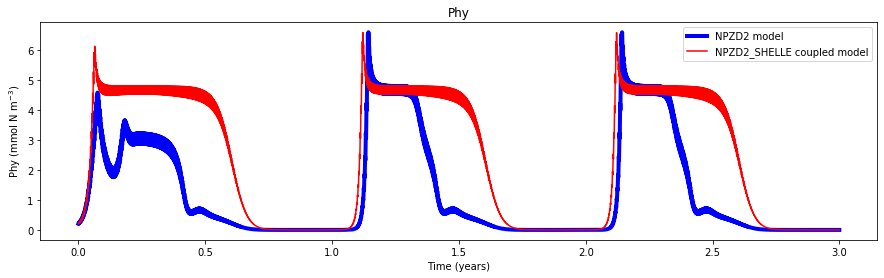

In [49]:
#%% Run standard NPZD2
import model_NPZD2 as model

days, dt, par, InitCond = model.load_defaults()
output_NPZD2 = model.run(days,dt,InitCond,par)


#%% Run NPZD2_SHELLE coupled model
import model_NPZD2_SHELLE as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()
InitCond['Soma'] = 0
InitCond['Gonad'] = 0
output_NPZD2_SHELLE = model.run(days,dt,InitCond,par)

#%% Plot
import matplotlib.pyplot as plt

fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(output_NPZD2['time']/365,output_NPZD2['Phy'],'b-', linewidth=4)
ax.plot(output_NPZD2_SHELLE['time']/365,output_NPZD2_SHELLE['Phy'],'r-')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Phy (mmol N m$^{-3}$)')
ax.set_title('Phy')
plt.legend(['NPZD2 model','NPZD2_SHELLE coupled model'])

Above we are plotting Phytoplankton Concentration (i.e. `Phy`). The two models should produce exactly the same result. Therefore, the two lines above (blue and red) should be on top of each other. As you can see in the plot above, the blue and red lines are very different. **There is something wrong**. <span class="important"></span> If you got the previous 2 questions wrong, make sure you go back and change your answer. 

In practice, you'll continue to "inspect" the differences between the two models (remember, there should be no difference) to see if you can figure out where is the problem. To save time, I'll point you straight to a key comparison in this particular case. Let's compare zooplankton.

Copy-paste the code below into <span class='file'>Lab5.py</span>, and <span class='runcell'></span>.... or you can also <span class="c2c"></span>

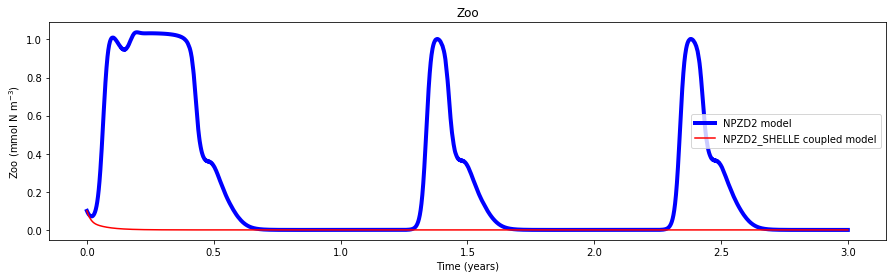

In [50]:
fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(output_NPZD2['time']/365,output_NPZD2['Zoo'],'b-', linewidth=4)
ax.plot(output_NPZD2_SHELLE['time']/365,output_NPZD2_SHELLE['Zoo'],'r-')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Zoo (mmol N m$^{-3}$)')
ax.set_title('Zoo')
plt.legend(['NPZD2 model','NPZD2_SHELLE coupled model'])

As you can see, in the original NPZD2 model zooplankton exhibits a yearly pattern (as expected), while in the coupled NPZD2_SHELLE zooplankton simply decreases exponentially. This hints that there is a problem in the "zooplankton" code in <span class='file'>model_NPZD2_SHELLE.py</span>. 

Take a close look at the "zooplankton" code, following what is it doing from top to bottom, and see if you can find the problem. Try not to look at the answer below until after you try on your own to find the problem.



<br>
<br>
<br>
...
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

The problem is that a SHELLE parameter `par['beta']` over-wrote a NPZD2 parameter `par['beta']`. In the `# Parameters` section, first we created the parameter with the following statement `par['beta']  = 0.75`. Then, when copy-pasting, we copy-pasted below a SHELLE parameter with the same name, `par['beta']  = 0.12`. Now, the two models use the same parameter, for SHELLE is no problem, `par['beta']` has the correct value. But for zooplankton, `par['beta']` is 3 times smaller than what it should be. 

The proper way to solve the issue would be to have separate dictionaries for every model. Therefore calling the parameters, for example, as follows: `par['NPZD2']['beta']`  vs `par['SHELLE']['beta']`. This will ensure that all model parameters will only work for one model. However, we would need to change all our code to implement this change.

In the interest of time, here we'll use a "hack" that will solve the problem, but will not prevent us from doing further mistakes in future model coupling exercises.

In <span class='file'>model_NPZD2_SHELLE.py</span>, in the `# Parameters` section for "SHELLE", change the "key" of `par['beta']` to `par['betaSHELLE']`, as shown below:

In [38]:
    # Parameters
    par = {}
    # NPZD2
    par['mu0']   = 0.69  
    par['kNO3']  = 0.5    
    par['kNH4']  = 0.5  
    par['alpha'] = 0.125  
    par['gmax']  = 0.6
    par['kP']    = 0.44
    par['mP']    = 0.15    
    par['tau']   = 0.005 
    par['thetaMax'] = 0.053
    par['beta']  = 0.75 
    par['lBM']   = 0.1    
    par['lE']    = 0.1
    par['mZ']    = 0.25
    par['rSD']   = 0.3
    par['rLD']   = 0.1 
    par['nmax']  = 0.05
    par['kI']    = 0.1
    par['I0']    = 0.0095
    # SHELLE
    par['AE_P']    = 0.9  
    par['AE_D']    = 0.2    
    par['AE_Z']    = 0.3  
    par['Bpub']    = 0.43  
    par['Fmax_ref'] = 0.025
    par['GT']       = 0.44
    par['KTempH']   = 0.1    
    par['KTempL']   = 0.5 
    par['KSaltL']   = 0.25
    par['KOxyL']    = 0.02 
    par['KFood']    = 1.    
    par['KRE']   = 0.86
    par['OxyL']  = 17.5
    par['Rm']    = 0.002
    par['SaltL'] = 10.
    par['TempH'] = 25.
    par['TempL'] = -4.
    par['betaSHELLE']  = 0.12  # <<<<<<<<<<<<<<<<<<<<<<<<< THIS LINE CHANGED !! >>>>>>>>>>>>>>>
    par['epsilonP'] = 1.
    par['epsilonD'] = 0.5
    par['epsilonZ'] = 0.3

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 1</a></span>

Now, in <span class='file'>model_NPZD2_SHELLE.py</span> > `# MAIN LOOP` section for "SHELLE" > `# Calculate Filtration rate` subsection, change the "key" of `par['beta']` to `par['betaSHELLE']`, as shown below:

In [ ]:
        # Calculate Filtration rate
        Fmax  = par['Fmax_ref']*(B[t]**(2./3.))
                
        F[t] = Fmax * L_Temp[t] * L_Salt[t] * L_Oxy[t] * L_Food[t]
        
        A[t] = F[t] * ((par['epsilonP']*par['AE_P']*Phy[t])+ \
                       (par['epsilonZ']*par['AE_Z']*Zoo[t])+ \
                       (par['epsilonD']*par['AE_D']*SDet[t]))
        
        R[t] = (par['Rm']*B[t]) + (par['betaSHELLE']*A[t]) # <<<<<<<<<<<<<<<<<<<<<<<<< THIS LINE CHANGED !! >>>>>>>>>>>>>>>
        
        RE[t] = max(0., (B[t]-par['Bpub'])/(par['KRE'] + B[t] - (2.*par['Bpub'])))
        

<span class="checkpoint"><a href="https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week2/checkpoints/NPZmodel_1.py" target="_blank">CHECKPOINT 12</a></span>

Save <span class='file'>model_NPZD2_SHELLE.py</span>...

Copy-paste the code below into <span class='file'>Lab5.py</span>, and <span class='runcell'></span>.... or you can also <span class="c2c"></span>

Model run: DONE!!!
Model run: DONE!!!


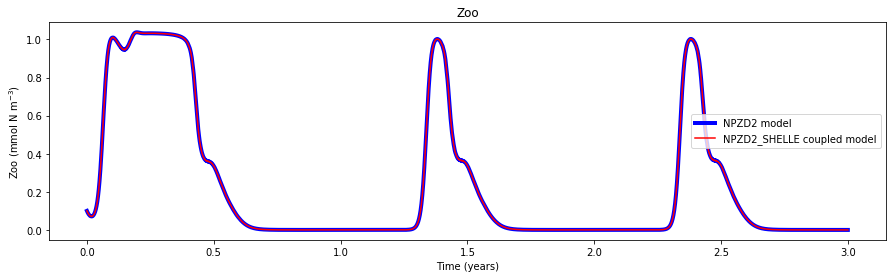

In [51]:
#%% Run standard NPZD2
import model_NPZD2 as model

days, dt, par, InitCond = model.load_defaults()
output_NPZD2 = model.run(days,dt,InitCond,par)


#%% Run NPZD2_SHELLE coupled model
import model_NPZD2_SHELLE as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()
InitCond['Soma'] = 0
InitCond['Gonad'] = 0
output_NPZD2_SHELLE = model.run(days,dt,InitCond,par)

#%% Plot
import matplotlib.pyplot as plt

fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(output_NPZD2['time']/365,output_NPZD2['Zoo'],'b-', linewidth=4)
ax.plot(output_NPZD2_SHELLE['time']/365,output_NPZD2_SHELLE['Zoo'],'r-')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Zoo (mmol N m$^{-3}$)')
ax.set_title('Zoo')
plt.legend(['NPZD2 model','NPZD2_SHELLE coupled model'])

**Yes! Now it Works!**

The two models produce the same `Zoo` results.

As a rule of thumb, if your model seems to works "ok" on the **3rd try**, there is small probably your model is actually working. 

Now lets run <span class='file'>model_NPZD2_SHELLE.py</span>...

You can copy-paste the code below into <span class='file'>Lab5.py</span>, and <span class='runcell'></span>.... or you can also <span class="c2c"></span>

Model run: DONE!!!


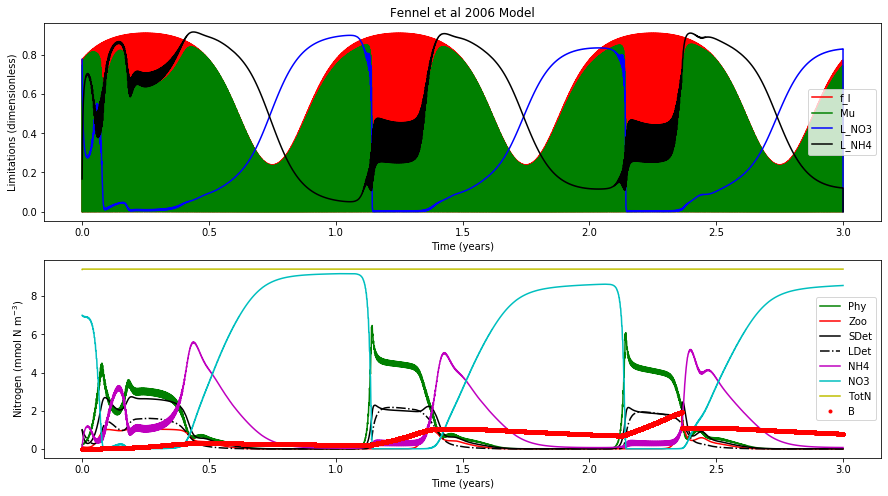

In [52]:
#%% Run standard SHELLE
import model_NPZD2_SHELLE as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()
output = model.run(days,dt,InitCond,par)
model.plot(output)

As you can see, this time `Zoo` raises up to about  1.5 $mmol N^{-3}$. Also `TotNit` is conserved. However there are some subtle differences when compared to the model run where zooplankton vanished to zero (i.e. run where we over-wrote `par['beta']`).

<div class="Q"><br>

How many times did our mussel spawn during the 3-year simulation?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Is the answer above the same as the number of spawnings in the model run were we had the wrong <b>par['beta']</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

When did our mussel spawned for the first time?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Is the answer above the same as the "time of first spawn" in the model run were we had the wrong <b>par['beta']</b>?

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>

Why?

<br><br><div class="qhelp"></div></div>

Now that our NPZD2_SHELLE model works, lets compare the `Phy` output of the NPZD2 model (without mussel) against our new NPZD2_SHELLE model (with mussel).

You can copy-paste the code below into <span class='file'>Lab5.py</span>, and <span class='runcell'></span>.... or you can also <span class="c2c"></span>

Model run: DONE!!!
Model run: DONE!!!


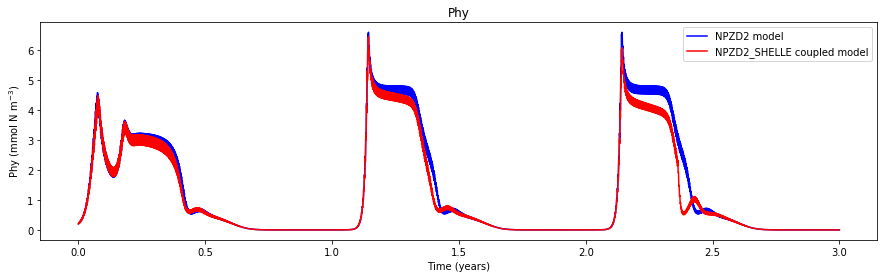

In [53]:
#%% Run standard NPZD2
import model_NPZD2 as model

days, dt, par, InitCond = model.load_defaults()
output_NPZD2 = model.run(days,dt,InitCond,par)


#%% Run NPZD2_SHELLE coupled model
import model_NPZD2_SHELLE as model
from importlib import reload
reload(model)

days, dt, par, InitCond = model.load_defaults()
output_NPZD2_SHELLE = model.run(days,dt,InitCond,par)

#%% Plot
import matplotlib.pyplot as plt

fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(output_NPZD2['time']/365,output_NPZD2['Phy'],'b-')
ax.plot(output_NPZD2_SHELLE['time']/365,output_NPZD2_SHELLE['Phy'],'r-')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Phy (mmol N m$^{-3}$)')
ax.set_title('Phy')
plt.legend(['NPZD2 model','NPZD2_SHELLE coupled model'])

As you can see, `Phy` in the two runs is similar, but it seems that `Phy` in the model WITH a mussel is lower.

<div class="Q"><br>

Why is <b>Phy</b> lower in the run WITH a mussel?

<br><br><div class="qhelp"></div></div>

Note that not all the time is `Phy` in NPDZ_SHELLE **lower** than `Phy` in NPDZ. To see this better, lets plot the DIFFERENCE. Lets plot `Phy` from NPDZ2 **MINUS** `Phy` from NPZD2_SHELLE:

You can copy-paste the code below into <span class='file'>Lab5.py</span>, and <span class='runcell'></span>.... or you can also <span class="c2c"></span>

Text(0.5, 1.0, 'Phy_NPZD2 MINUS Phy_NPZD2_SHELLE')

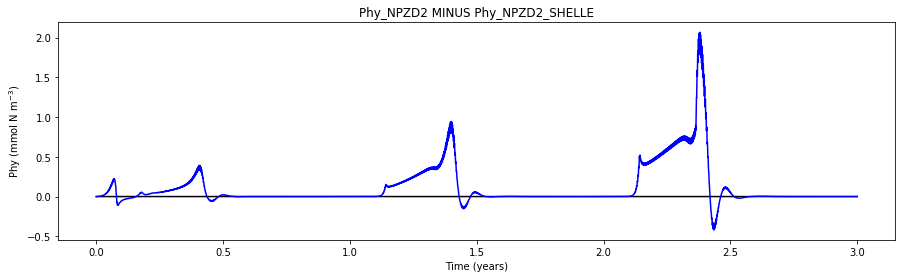

In [54]:
import numpy as np
fig, (ax) = plt.subplots(1,1,figsize=(15, 4))
ax.plot(output_NPZD2['time']/365, np.zeros((len(output_NPZD2['time']),),float),'k-')
ax.plot(output_NPZD2['time']/365,(output_NPZD2['Phy']-output_NPZD2_SHELLE['Phy']),'b-')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Phy (mmol N m$^{-3}$)')
ax.set_title('Phy_NPZD2 MINUS Phy_NPZD2_SHELLE')

Can you see that there are some times that "Phy_NPZD2 MINUS Phy_NPZD2_SHELLE" is negative (i.e. sometimes `Phy` with mussel is greater `Phy` without)?

<div class="Q"><br>

Why do think <b>Phy</b> WITH a mussel is sometimes greater than <b>Phy</b> WITHOUT?

<br><br><div class="qhelp"></div></div>

Click the following link to see the final <span class="file">model_NPZD2_SHELLE.py</span> file: https://raw.githubusercontent.com/Diego-Ibarra/aquaculture-modelling/master/Week5/model_NPZD2_SHELLE.py

_Please beware that this model was designed as a teaching tool and may not be adequate to represent realistic applications_.

# **This is the end of lab**

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [44]:
# Loads css file and applies it to lab HTML
from IPython.core.display import HTML
def css():
    style = open("../css/custom.css", "r").read()
    return HTML(style)
css()